First 5 rows of dataset:
         Date        Open        High         Low       Close   Adj Close  \
0  2014-09-29  100.589996  100.690002   98.040001   99.620003   93.514290   
1  2014-10-06   99.949997  102.379997   98.309998  100.730003   94.556244   
2  2014-10-13  101.330002  101.779999   95.180000   97.669998   91.683792   
3  2014-10-20   98.320000  105.489998   98.220001  105.220001   98.771042   
4  2014-10-27  104.849998  108.040001  104.699997  108.000000  101.380676   

      Volume  
0  142718700  
1  280258200  
2  358539800  
3  358532900  
4  220230600  


C:\Users\Hari\AppData\Local\Temp\ipykernel_3032\2190108673.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['Close'].resample('M').mean()


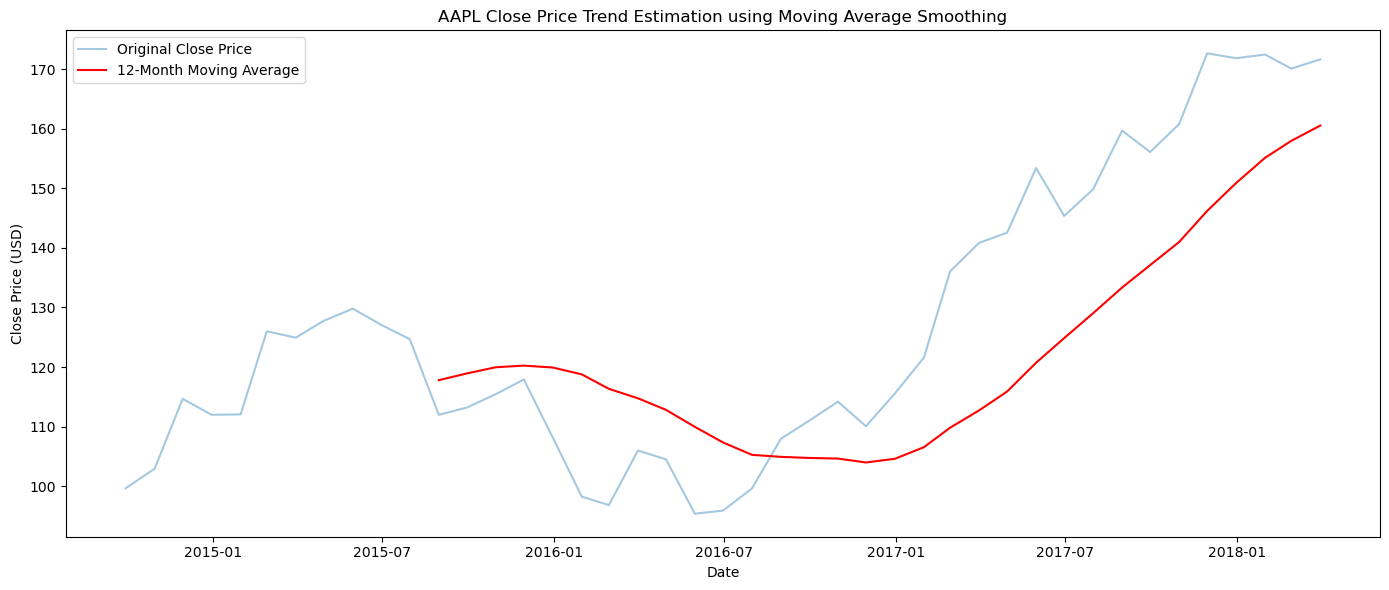

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the AAPL dataset
df = pd.read_csv("C:\\Users\\Hari\\Downloads\\AAPL.csv")

# Display first few rows
print("First 5 rows of dataset:")
print(df.head())

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Ensure 'Close' column exists
if 'Close' not in df.columns:
    raise ValueError("The dataset does not contain a 'Close' column.")

# Resample the data to monthly (take the mean closing price of each month)
df_monthly = df['Close'].resample('M').mean()

# Apply Moving Average Smoothing (e.g., 12-month window)
window_size = 12
df_smooth = df_monthly.to_frame(name='Close')
df_smooth['Moving_Avg'] = df_smooth['Close'].rolling(window=window_size).mean()

# Plot the original and smoothed series
plt.figure(figsize=(14, 6))
plt.plot(df_smooth['Close'], label='Original Close Price', alpha=0.4)
plt.plot(df_smooth['Moving_Avg'], label=f'{window_size}-Month Moving Average', color='red')
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.title("AAPL Close Price Trend Estimation using Moving Average Smoothing")
plt.legend()
plt.tight_layout()
plt.show()
